In [1]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets 

In [38]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075
par['omega'] = 0.15
par['delta'] = 0.80
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

## Question 1
Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

In [53]:
# Defining the AD and the SRAS functions

# i. Defining symbols
sm.init_printing(use_unicode=True)
pit = sm.symbols('pi_t')
pit1 = sm.symbols('pi_t-1')
alpha = sm.symbols('alpha')
gamma = sm.symbols('gamma')
phi = sm.symbols('phi')
h = sm.symbols('h')
b = sm.symbols('b')
vt = sm.symbols('v_t')
yt = sm.symbols('y_t')
yt1 = sm.symbols('y_t-1')
st = sm.symbols('s_t')
st1 = sm.symbols('s_t-1')


# ii. AD-curve 
AD = sm.Eq(1/(h*alpha)*(vt-(1+b*alpha)*yt), pit)

# iii. SRAS-curve 
SRAS = sm.Eq(pit1 + gamma*yt - phi*gamma*yt1 + st - phi*st1, pit)


The equilibrium value of y is:


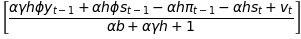

In [54]:
# Solving for y

# i. Setting AD equal to SRAS 
AD_SRAS = sm.Eq(1/(h*alpha)*(vt-(1+b*alpha)*yt), pit1 + gamma*yt - phi*gamma*yt1 + st - phi*st1)

# ii. Solving for y 
yt_star = sm.solve(AD_SRAS, yt)

# iii. Printing y*
print(f'The equilibrium value of y is:')
yt_star

The equilibrium value of pi is:


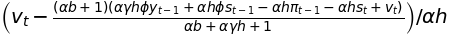

In [55]:
# Solving for pi 

# i. Inserting y* in the AD function
pit_star = 1/(h*alpha)*(vt-(1+b*alpha)*yt_star[0])

# ii. Printing pi*
print(f'The equilibrium value of pi is:')
pit_star

In [52]:
np.random.seed(11)

num = 1000

x = np.random.normal(0,par['sigma_x'],num)
x[0] = 0
c = np.random.normal(0,par['sigma_c'],num)
c[0] = 0

def solve_y(alpha,gamma,h,phi,y1,s,s1,pi1,v,b):
    return (alpha*gamma*h*phi*y1+alpha*h*phi*s1-alpha*h*pi1-alpha*h*s+v)/(alpha*b+alpha*gamma*h+1)

def solve_pi(alpha,gamma,h,phi,y,y1,s,s1,pi1,v,b):
    return (v-((alpha*b+1)*(alpha*gamma*h*phi*y1+alpha*h*phi*s1-alpha*h*pi1-alpha*h*s+v))/(alpha*b+alpha*gamma*h+1))/(alpha*h)

s = np.zeros(num)
v = np.zeros(num)

for i in range(1,num):
    s[i] = par['omega']*s[i-1]+c[i]
    v[i] = par['delta']*v[i-1]+x[i]
    
def corr(x):
    y = [0]
    pi = [0]
    for i in range(1,num):
        y.append(solve_y(par['alpha'],par['gamma'],par['h'],par['phi'],y[i-1],s[i],s[i-1],pi[i-1],v[1],par['b']))
        pi.append(solve_pi(par['alpha'],par['gamma'],par['h'],par['phi'],y,y[i-1],s[i],s[i-1],pi[i-1],v[i],par['b']))
    return np.corrcoef(y,pi)[0,1]

s

array([ 0.00000000e+00,  2.58337430e-01, -1.64152450e-01,  7.92300289e-02,
        2.73501408e-01, -1.49360271e-01,  4.04677477e-01,  2.37681748e-01,
       -4.04633385e-01,  2.23771094e-01,  4.22588075e-01,  1.55153420e-02,
       -3.18883363e-02,  7.47901700e-02, -3.66253845e-01, -1.89910149e-02,
        1.89735257e-01, -7.75600515e-02,  2.16910881e-01,  4.81156544e-01,
       -3.17732944e-01, -4.07155978e-01, -1.98810385e-01,  1.01822772e-01,
        9.64687847e-02, -1.66019893e-01, -2.49213348e-01, -1.80682393e-01,
        3.18539766e-01, -1.40073790e-01, -1.33871424e-01,  1.75761846e-01,
       -2.39726487e-02, -1.99602840e-01,  2.62219583e-01,  1.10857790e-01,
       -1.17246973e-01, -9.02202943e-02,  1.78741207e-01, -4.14243817e-02,
        5.14413876e-02,  1.92652060e-01,  2.35731243e-01, -3.28240121e-01,
       -1.40690579e-01, -8.13174890e-02,  1.57921390e-02,  1.65071257e-01,
        2.67801865e-01, -4.27045117e-02, -2.20291129e-01,  1.47801132e-02,
       -1.08719385e-01,  